# Target Population

The target population of a pizza shop is going to be **people between the ages of 20 and 60.** The data of the kids is irrelevant since it's their parents buying pizza for their family. To find this, we will look at census data of the different neighborhoods of Pittsburgh.

![CatPizza](https://media4.giphy.com/media/5ZZbMGV6EQANO/giphy.gif?cid=ecf05e47het9xifvmpop59snx8givcj9o7o600ai3tj3s99u&ep=v1_gifs_search&rid=giphy.gif&ct=g)

In [3]:
import pandas as pd
import math

pop = pd.read_csv("neighborhoods.csv", index_col= "Neighborhood_2010_HOOD")

In [4]:
pop['Sum'] = 0.0
pop['tot'] = 0.0
targetpop= pop[["Pop__2010","F__Pop__Age_20_34__2010_","F__Pop__Age_35_59__2010_","Sum",'tot']]
targetpop.head(90)

,Pop__2010,F__Pop__Age_20_34__2010_,F__Pop__Age_35_59__2010_,Sum,tot
Neighborhood_2010_HOOD,,,,,
Central Oakland,6086,72.28%,6.72%,0.0,0.0
North Oakland,10551,37.67%,7.50%,0.0,0.0
West Oakland,2604,29.38%,17.01%,0.0,0.0
Crawford-Roberts,2256,21.04%,30.27%,0.0,0.0
Strip District,616,30.28%,36.03%,0.0,0.0
...,...,...,...,...,...
Chartiers City,477,12.68%,33.97%,0.0,0.0
Ridgemont,483,25.16%,42.80%,0.0,0.0
West End,254,29.31%,8.62%,0.0,0.0


I created two extra colums. The column 'Sum' is where I will add the percentages of people between 20 and 34, and the percentage of people between 35 and 59, getting the percentage of the population who is between 20 and 60. And the column 'tot' or total, is where I will eventually multiply the sum of percentages by the total population, giving me the true value of people between 20 and 60 in each neighborhood.

In [5]:
for index, row in targetpop.iterrows():
    sum_values = pd.to_numeric(row["F__Pop__Age_20_34__2010_"].rstrip('%'), errors='coerce') + pd.to_numeric(row["F__Pop__Age_35_59__2010_"].rstrip('%'), errors='coerce')
    targetpop.at[index, 'Sum'] = sum_values/100 #creates percentage value
    
targetpop.head()

,Pop__2010,F__Pop__Age_20_34__2010_,F__Pop__Age_35_59__2010_,Sum,tot
Neighborhood_2010_HOOD,,,,,
Central Oakland,6086,72.28%,6.72%,0.7900,0.0
North Oakland,10551,37.67%,7.50%,0.4517,0.0
West Oakland,2604,29.38%,17.01%,0.4639,0.0
Crawford-Roberts,2256,21.04%,30.27%,0.5131,0.0
Strip District,616,30.28%,36.03%,0.6631,0.0


Above, I iterated through each row and added the percentages of 20-34 year olds and 35-59 year olds. Since the dataset provided all the percentage values as text, I had to strip off the '%' and convert the remainding number to a numeric. Then, to make sure it was a percentage, I divided that final number by 100.

In [6]:
for index, row in targetpop.iterrows():
    tot_values = pd.to_numeric(row['Pop__2010'], errors='coerce') * row["Sum"]
    targetpop.at[index, 'tot'] = math.floor(tot_values)
    
targetpop.head()

,Pop__2010,F__Pop__Age_20_34__2010_,F__Pop__Age_35_59__2010_,Sum,tot
Neighborhood_2010_HOOD,,,,,
Central Oakland,6086,72.28%,6.72%,0.7900,4807.0
North Oakland,10551,37.67%,7.50%,0.4517,4765.0
West Oakland,2604,29.38%,17.01%,0.4639,1207.0
Crawford-Roberts,2256,21.04%,30.27%,0.5131,1157.0
Strip District,616,30.28%,36.03%,0.6631,408.0


I then multiplied the 'Sum' percentage by the population of the neighborhood, leaving me with the total number of people between age 20-60 which I then put in the coloum 'tot'. The next section is where I sorted the neighborhoods in decending order of total target population. 

In [7]:
targetpop=targetpop.sort_values(by='tot',ascending=False)
targetpop.head()

,Pop__2010,F__Pop__Age_20_34__2010_,F__Pop__Age_35_59__2010_,Sum,tot
Neighborhood_2010_HOOD,,,,,
Shadyside,13915,50.35%,22.69%,0.7304,10163.0
Squirrel Hill South,15110,29.36%,32.50%,0.6186,9347.0
Brookline,13214,25.57%,33.95%,0.5952,7864.0
Mount Washington,8799,35.67%,30.10%,0.6577,5787.0
Carrick,10113,16.55%,40.63%,0.5718,5782.0


Shadyside has the most people between ages 20 and 60 by almost 1000. Now, to display these findings, I will import and use geopandas.

In [8]:
import geopandas as gpd
%matplotlib inline
nhoods = gpd.read_file("Neighborhoods/Neighborhoods_.shp")
print(nhoods.columns)

Index(['objectid', 'fid_blockg', 'statefp10', 'countyfp10', 'tractce10',
       'blkgrpce10', 'geoid10', 'namelsad10', 'mtfcc10', 'funcstat10',
       'aland10', 'awater10', 'intptlat10', 'intptlon10', 'shape_leng',
       'fid_neighb', 'area', 'perimeter', 'neighbor_', 'neighbor_i', 'hood',
       'hood_no', 'acres', 'sqmiles', 'dpwdiv', 'unique_id', 'sectors',
       'shape_le_1', 'shape_ar_1', 'page_numbe', 'plannerass', 'created_us',
       'created_da', 'last_edite', 'last_edi_1', 'Shape__Are', 'Shape__Len',
       'geometry'],
      dtype='object')


With the following information of the Neighborhoods shape file I can properly merge the geographical data with my original dataframe.

In [9]:
popmap= nhoods.merge(targetpop, how='left', left_on='hood', right_on='Neighborhood_2010_HOOD')
popmap[['hood','tot','geometry']].head()

,hood,tot,geometry
0,Central Oakland,4807.0,"POLYGON ((-79.95304 40.44203, -79.95302 40.442..."
1,North Oakland,4765.0,"POLYGON ((-79.95455 40.45882, -79.95427 40.458..."
2,West Oakland,1207.0,"POLYGON ((-79.96230 40.44294, -79.96220 40.442..."
3,Crawford-Roberts,1157.0,"POLYGON ((-79.98275 40.44641, -79.98273 40.446..."
4,Strip District,408.0,"POLYGON ((-79.97494 40.45629, -79.97484 40.456..."


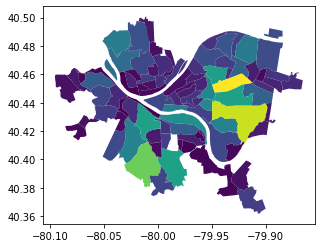

In [10]:
popmap.plot(column='tot')

And then cleaning it up and adding a scale, we get:

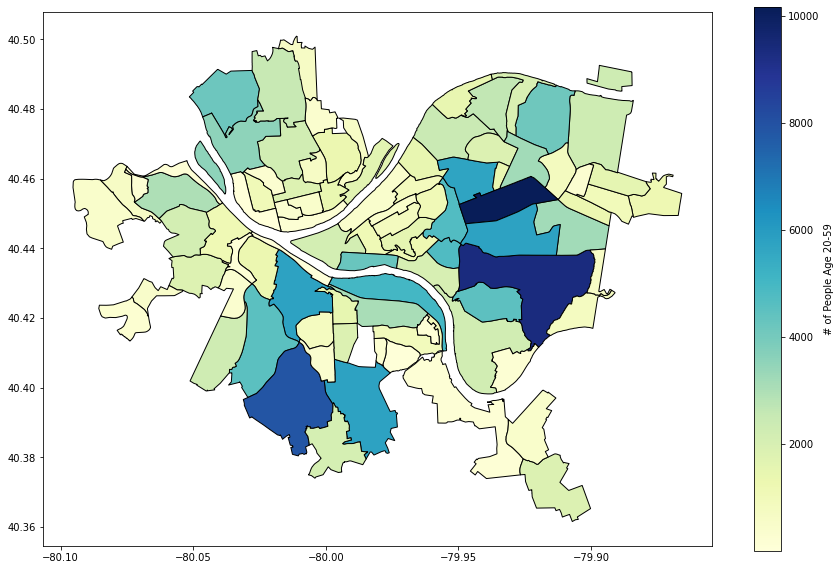

In [18]:
popmap.plot(column='tot', # set the data to be used for coloring
               cmap='YlGnBu',              # choose a color palette
               edgecolor="black",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "# of People Age 20-59"}, # label the legend
               figsize=(15, 10),         # set the size
               #missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
               )

Now we can clearly see the spread of the target population and which neighborhoods have a more concentrated amount. From the map, the Oakland area conatins a large amount of the target population, likely due to both the University of Pittsburgh and Carnegie Mellon University campuses. It also gets more blue around the bottom of the map around brookline. The best Pittsburgh neighborhoods to open a pizza shop in based on the amount of the target population (people age 20-60) would be Shadyside with 10,163 people, Squirrel Hill South with 9,347 people, and Brookline with 7,864 people.

![WWPIZZA](https://www.pizzanecklaces.com/wp-content/uploads/2019/12/breaking-bad-pizza-gif.gif)